# Business Data Science - Homework 1
## Matt Viteri & Yu Mo

### Programming Questions

In [131]:
# Setup
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import math
import random

#### Question 1.

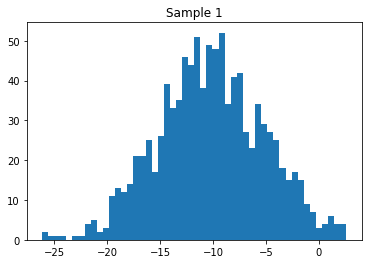

In [132]:
sample1 = np.random.normal(-10, 5, 1000)

plt.hist(sample1, 50)
plt.title('Sample 1')
plt.show()

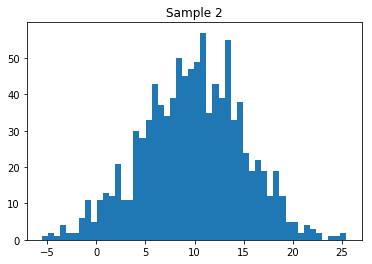

In [133]:
sample2 = np.random.normal(10, 5, 1000)

plt.hist(sample2, 50)
plt.title('Sample 2')
plt.show()

#### 1 a.

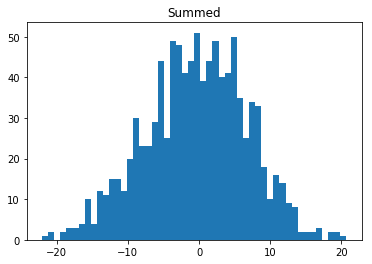

In [134]:
summed = np.add(sample1, sample2)

plt.hist(summed, 50)
plt.title('Summed')
plt.show()

We observe a normally distributed data set represented by the histogram above. It also appears to have summed the standard deviations from the prior sample sets but we can't tell for sure.

#### 1 b.

The new mean appears to be around 0. That makes sense from averaging the previous means of 10 and -10

It's hard to tell exactly where the new standard deviation is but I'm estimating between 5 and 10. If that's the case then the variance will be between 25 and 100 since the variance is the square of the standard deviation.

#### Question 2.
$ X_i $ is a Bernoulli random variable with value {-1,1}

$ Z_n = \frac{1}{\sqrt{n}} \sum X_i $

Taking 1000 draws of $ Z_n $ with varying sizes of n

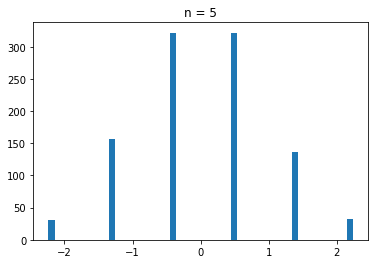

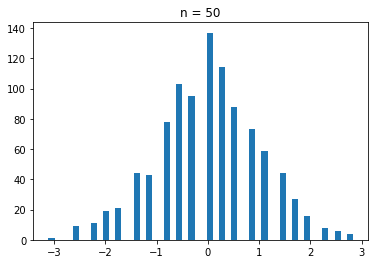

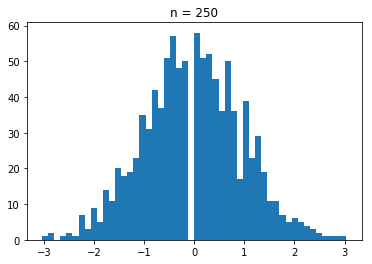

In [141]:
def centralLimitTest(num):
    b = [-1, 1]
    total = 0
    for x in range(1, num + 1):
        rand = random.choice(b)
        total += rand
    return total / math.sqrt(num)
    

# Small n - size 5
smallBucket = []
for x in range(1000):
    smallBucket.append(centralLimitTest(5))

plt.hist(smallBucket, 50)
plt.title('n = 5')
plt.show()

# Medium n - size 50
mediumBucket = []
for x in range(1000):
    mediumBucket.append(centralLimitTest(50))
    
plt.hist(mediumBucket, 50)
plt.title('n = 50')
plt.show()

# Large n - size 250
largeBucket = []
for x in range(1000):
    largeBucket.append(centralLimitTest(250))
    
plt.hist(largeBucket, 50)
plt.title('n = 250')
plt.show()

#### Question 3.

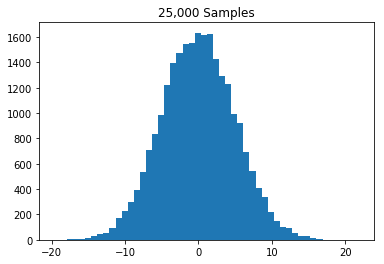

The mean is: -0.046162421152883035
The variance is: 24.720113765348117
The standard deviation is: 4.971932598632861


In [142]:
data = np.random.normal(0, 5, 25000)
plt.hist(data, 50)
plt.title('25,000 Samples')
plt.show()

mean = sum(data) / len(data)
print('The mean is:', mean)

squares = 0
for num in data:
    square = (num - mean) ** 2
    squares += square
    
variance = squares / len(data)
print('The variance is:', variance)

std = math.sqrt(variance)
print('The standard deviation is:', std)

#### Question 4.

In [2]:
sample_num = 10000
mean_4 = [5, -5]
cov_4 = [[20, 0.8],[0.8, 30]]
x4, y4 = np.random.multivariate_normal(mean_4, cov_4, sample_num).T

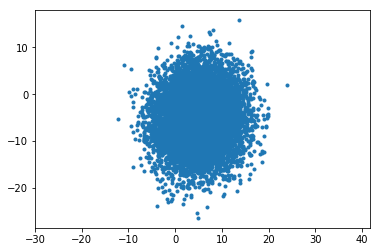

In [9]:
plt.plot(x4, y4, '.')
plt.axis('equal')
plt.show()

In [14]:
X4 = np.random.multivariate_normal(mean_4, cov_4, sample_num)

In [17]:
X4.shape

(10000, 2)

For multivariate random variables $x_1, x_2, ... , x_N, N=10,000 \, i.i.d.$, suppose the distribution they obey is $\mathcal N (\boldsymbol{\mu}, \boldsymbol{\Sigma})$. 

Using the maximum likelihood estimation (MLE), then we have
$$ \begin{equation}
\begin{aligned}
L(\boldsymbol{\mu}, \boldsymbol{\Sigma}) &= f_{\boldsymbol{\mu}, \boldsymbol{\Sigma}}(x_1)\centerdot f_{\boldsymbol{\mu}, \boldsymbol{\Sigma}}(x_2) \centerdot\centerdot\centerdot f_{\boldsymbol{\mu}, \boldsymbol{\Sigma}}(x_N) \\
&= (2\pi)^{\frac{2N}{2}}\centerdot |\boldsymbol{\Sigma}|^{-\frac{N}{2}}\centerdot e^{-\frac{1}{2}\sum_{i=1}^N{(x_i-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(x_i-\boldsymbol{\mu})}} \\
lnL(\boldsymbol{\mu}, \boldsymbol{\Sigma}) &= -Nln(2\pi)-\frac{N}{2}|\boldsymbol{\Sigma}|-\frac{1}{2}\sum^{N}_{i=1}{(x_i-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(x_i-\boldsymbol{\mu})}
\end{aligned}
\end{equation}
$$

Let the derivative of $\boldsymbol{\mu}$ equals 0, which is
$$
\begin{equation}
\begin{aligned}
\frac{\partial lnL(\boldsymbol{\mu}, \boldsymbol{\Sigma})}{\partial \boldsymbol{\mu}} &= -2\sum^{N}_{i=1}{\boldsymbol{\Sigma}^{-1}x_i+2N\boldsymbol{\Sigma}^{-1}\mu} \\
\widehat{\boldsymbol{\mu}} &= \frac{1}{N}\sum^{N}_{i=1}{x_i} = \bar{x}
\end{aligned}
\end{equation}
$$

Same to $\boldsymbol{\Sigma}$, then we have
$$
\begin{equation}
\begin{aligned}
\frac{\partial lnL(\boldsymbol{\mu}, \boldsymbol{\Sigma})}{\partial \boldsymbol{\Sigma}} &= (\boldsymbol{\Sigma}^{-1}-\boldsymbol{\Sigma}^{-1}\frac{1}{N}\sum^N_{i=1}{(x_i-\boldsymbol{\mu})(x_i-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}})^T \\
\widehat{\boldsymbol{\Sigma}} &= \frac{1}{N}\sum^N_{i=1}{(x_i-\boldsymbol{\mu})(x_i-\boldsymbol{\mu})^T} \\
&= \frac{1}{N}\sum^N_{i=1}{(x_i-\bar{x})(x_i-\bar{x})^T}
\end{aligned}
\end{equation}
$$

In [63]:
x_mean = 0
y_mean = 0
for x in X4:
    x_mean += x[0]
    y_mean += x[1]
x_mean = x_mean*1.0 / sample_num
y_mean = y_mean*1.0 / sample_num

In [65]:
mean_hat = np.array([x_mean, y_mean])

In [56]:
cov_hat = np.array([[0, 0], [0,0]])
for x in X4:
    temp = np.array([np.subtract(x, mean_hat)])
    cov_hat = np.add(cov_hat, (temp.T).dot(temp))
cov_hat = np.divide(cov_hat, sample_num*1.0)

In [66]:
mean_hat

array([ 4.93426591, -5.12027065])

In [59]:
cov_hat

array([[ 19.89521702,   0.78677649],
       [  0.78677649,  30.0093585 ]])

#### Question 5.

In [144]:
df = pd.read_csv('PatientData.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


#### 5 a.

In [145]:
print(df.info())

print('\nThere are {rows} rows and {columns} columns'.format(rows=len(df), columns=len(df.columns)))
print('Typically, one column will be the target (Y) variable so the number of features will be one less')
print('Summary:\nPatients - {rows}\nFeatures - {columns}'.format(rows=len(df), columns=len(df.columns) - 1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.8+ KB
None

There are 452 rows and 280 columns
Typically, one column will be the target (Y) variable so the number of features will be one less
Summary:
Patients - 452
Features - 279


#### 5 b.

In [146]:
# Feature meanings:
# Column 1
print('Column 1:')
print('This column has a min of {min} and a max of {max}'.format(min=df[0].min(), max=df[0].max()))
print('It\'s plausible that this column could represent age since there isn\'t any negative numbers\n')

# Column 2
print('Column 2:')
print('An initial look appears to present this column as a binary option. \
Upon further inspection the distinct values of this column are: {}'.format(df[1].unique()))
print('Confirmation of the binary option leads me to believe it\'s something like smoking / non-smoking or \
more convincingly a gender (male / female)\n')

# Column 3
print('Column 3:')
print('This column has a min of {min} and a max of {max}'.format(min=df[2].min(), max=df[2].max()))
print('Our initial guess for this column is "weight" but the max of 780 has drawn some skepticism so we needed to dig a little deeper')
print('Rows over 300: {}'.format(len(df[df[2] > 300])))
print('There are only two rows over 300 and those represent 608 and 780. However, the correspond to "ages" 0 and 1 in the first column.\
That being said, taken independently we still see weight as a viable option and are questioning data anomalies\n')

# Column 4
print('Column 4:')
print('This column has a min of {min} and a max of {max}'.format(min=df[3].min(), max=df[3].max()))
print('We initially thought this could be another weight metric such as kilograms but the ratios don\'t work out. \
Dividing column 3 by column 4 multiple times doesn\'t yield a consistent multiplier. Many of the values seem to \
fall within the range of normal blood pressures however\n' )

# Summary / Estimates
print('Summary / Estimates:\nFeature 1 - age\nFeature 2 - gender\nFeature 3 - weight\nFeature 4 - blood pressure')

Column 1:
This column has a min of 0 and a max of 83
It's plausible that this column could represent age since there isn't any negative numbers

Column 2:
An initial look appears to present this column as a binary option. Upon further inspection the distinct values of this column are: [0 1]
Confirmation of the binary option leads me to believe it's something like smoking / non-smoking or more convincingly a gender (male / female)

Column 3:
This column has a min of 105 and a max of 780
Our initial guess for this column is "weight" but the max of 780 has drawn some skepticism so we needed to dig a little deeper
Rows over 300: 2
There are only two rows over 300 and those represent 608 and 780. However, the correspond to "ages" 0 and 1 in the first column.That being said, taken independently we still see weight as a viable option and are questioning data anomalies

Column 4:
This column has a min of 6 and a max of 176
We initially thought this could be another weight metric such as kilogr

#### 5 c.

In [149]:
# By opening the csv file in preview we can see that there are question marks in certain columns
# Specifically column 13. We can verify with the following boolean mask
# print(df[df[13] == '?'].head())

# We're going to replace these question marks with nan since there are built-in functions to handle that
df = df.replace('?', np.nan)

# Now we are going to use the fillna function to replace NaN with the mean
df.fillna(df.mean(axis=1), inplace=True)
df[13].head()

0    12.3178
1    12.3178
2         23
3    12.3178
4    12.3178
Name: 13, dtype: object

#### 5 d.

We can test which features strongly influence the patient condition by using a correlation matrix

In [109]:
cor = df.corr()
# You may optionally display the following heatmap below but it will take a 
# couple minutes to run because of the size of this dataset

# plt.figure(figsize=(12,10))
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

In [127]:
# The last column is the condition the patient has. We will take that as the target variable and 
# look for the highly correlated features with this column
cor_target = abs(cor[279])

cor_target = cor_target.dropna()
cor_target.sort_values(ascending=False).head(10)

279    1.000000
90     0.368876
4      0.323879
92     0.313982
102    0.282523
223    0.235488
233    0.218811
162    0.197555
17     0.195198
242    0.189458
Name: 279, dtype: float64

In [129]:
# We ignore the first value since that is the actual column we are testing for
# That means the three more important features are the next three

print('Most important:\nFeature 90\nFeature 4\nFeature 92')

Most important:
Feature 90
Feature 4
Feature 92


# Written Questions

#### Question 1. 

(a) What is the probability that X = 1?
$$\begin{equation}
\begin{aligned}P(X=1)&=P(X=1 , \, Y=0) + P(X=1 , \, Y=1) \\
&=\frac{1}{4} + \frac{1}{3} \\
&=\frac{7}{12}
 \end{aligned}
 \end{equation}$$

(b) What is the probability that X = 1 conditioned on Y = 1?
$$\begin{equation}
\begin{aligned}
P(X=1|Y=1)&=\frac{P(X=1,\, Y=1)}{P(Y=1)}\\
&=\frac{\frac{1}{3}}{\frac{1}{6}+\frac{1}{3}} \\
&=\frac{2}{3}
\end{aligned}
\end{equation}
$$

(c) What is the variance of the random variable X?
$$ EX = 0 * P(X=0) + 1 * P(X=1) = \frac{7}{12} $$
$$\begin{equation}
\begin{aligned}
DX &= E(X - EX)^2 \\
&= EX^2 - (EX)^2 \\
&= 0.2431
\end{aligned}
\end{equation}
$$

(d) What is the variance of the random variable X conditioned that Y = 1?
$$ E[X|Y=1] = 0 * P(X=0|Y=1) + 1 * P(X=1|Y=1) = \frac{2}{3} $$
$$\begin{equation}
\begin{aligned}
D[X|Y=1] &= E[X|Y=1 - E[X|Y=1]]^2 \\
&= \frac{2}{9}
\end{aligned}
\end{equation}
$$

(e) What is $E[X^3+X^2+3Y^7|Y=1]$?
$$\begin{equation}
\begin{aligned}
E[X^3+X^2+3Y^7|Y=1] &= E[X^3|Y=1] + E[X^2|Y=1] + E[3Y^7|Y=1] \\
&=\frac{2}{3} + \frac{2}{3} + 3 \\
&= \frac{13}{3}
\end{aligned}
\end{equation}$$

#### Question 2
Since $\vec{v_1}$ and $\vec{v_2}$, the basis of the subspace is not orthogonal, and the subspace $V = Range(A),\, A=[\vec{v_1},\vec{v_2}]$. Then we have the $\prod_V(\vec{y})=A(A^TA)^{-1}A^T\vec{y}$.

First, we can calculate the common $A(A^TA)^{-1}A^T$.
$$ A=
\begin{pmatrix}
1 & 1 \\
1 & 0 \\
1 & 0
\end{pmatrix}
$$
$$
(A^TA)=
\begin{pmatrix}
3 & 1 \\
1 & 1
\end{pmatrix}
$$
$$
(A^TA)^{-1}=
\begin{pmatrix}
\frac{1}{2} & -\frac{1}{2} \\
-\frac{1}{2} & \frac{3}{2}
\end{pmatrix}
$$
$$
A(A^TA)^{-1}A^T=
\begin{pmatrix}
1 & 0 & 0 \\
0 & \frac{1}{2} & \frac{1}{2} \\
0 & \frac{1}{2} & \frac{1}{2}
\end{pmatrix}
$$
$$ \begin{equation}
\begin{aligned}
Proj_1(P_1) &= A(A^TA)^{-1}A^T * \vec{p_1} \\
&= [3,3,3]^T \\
Proj_2(P_2) &= A(A^TA)^{-1}A^T * \vec{p_2} \\
&= [1,\frac{5}{2},\frac{5}{2}]^T \\
Proj_1(P_3) &= A(A^TA)^{-1}A^T * \vec{p_3} \\
&= [0,\frac{1}{2},\frac{1}{2}]^T \\
\end{aligned}
\end{equation}
$$
The coordinate of the three points should be [3, 3, 3], [1, 5/2, 5/2], [0, 1/2, 1/2].

#### Question 3.
Suppose that each toss is called trail $X_i(i=1,2,...,n)$, then $X_1, X_2, ..., X_n$ are the independent and identical distributed $X\sim \mathcal B(n,p)$. 

According to the Central Limit Theorem, when n becomes big enough, $Y_n=\frac{\sum^n_{i=1}X_i - n\mu}{\sqrt{n}\sigma},\mu=E(X_i) \, \sigma^2=D(X_i)$, $Y_n$ approximately obeys to standard normal distribution $\mathcal N(0,1)$.

$$\begin{equation}
\begin{aligned}
P(\Sigma^n_{i=1}X_i\le 50) &= P(\frac{\sum^n_{i=1}X_i-n\mu}{\sqrt{n}{\sigma}}\le \frac{50-np}{\sqrt{n}{\sigma}}) \\
&= P(Y_n \le \frac{50-100*\frac{2}{3}}{\sqrt{100*\frac{2}{3}*(1-\frac{2}{3})}}) \\
&= \phi(-\frac{5\sqrt{2}}{2})\\
&\simeq \phi(-3.54) \\
&= 1-\phi(3.54) \\
&= 0.0002001
\end{aligned}
\end{equation}
$$